### Importing Important Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [6]:
# Creating Database 'sales'
conn = sqlite3.connect('Sales.db')
# Creating cursor to execute SQL commands
cursor = conn.cursor() # Creating cursor to execute SQL commands

### Creating Tables

In [7]:
# Creating Orders Table
cursor.execute("""
create table if not exists Orders(
    TransactionID Integer,
    OrderDate date,
    CustomerID Integer,
    ProductID Integer,
    Quantity Integer,
    TotalAmount Integer
)""")

# Creating Customers Table
cursor.execute("""
create table if not exists Customers(
    CustomerID Integer,
    Name text,
    Region text,
    Segment text
)""")

# Creating Products Table
cursor.execute("""
create table if not exists Products(
    ProductID integer,
    ProductName text,
    Category text,
    Price integer)""")

# Creating Sales Table
cursor.execute("""
create table if not exists Sales(
    OrderID integer,
    Revenue integer,
    Discounts integer,
    Taxes integer)""")

# Creating Sales Analysis Table bu joining all tables
cursor.execute("""
create table if not exists Sales_Analysis(
    TransactionID Integer,
    OrderDate date,
    CustomerID Integer,
    ProductID Integer,
    Quantity Integer,
    TotalAmount Integer,
    Name text,
    Region text,
    Segment text,
    ProductName text,
    Category text,
    Price integer,
    OrderID integer,
    Revenue integer,
    Discounts integer,
    Taxes integer)""")
 
    # Commit changes
conn.commit()

### Creating CSV Files

In [8]:
Orders = pd.read_csv('Orders_Large.csv')
Customers = pd.read_csv('Customers_Large.csv')
Sales = pd.read_csv('Sales_Large.csv')
Products = pd.read_csv('Products_Large.csv')

#### Joining all Tables into one

In [9]:
Orders_Customers = pd.merge(Orders,Customers,on='CustomerID',how='inner')
Pro_Ord_Cus = pd.merge(Orders_Customers,Products,on='ProductID',how='inner')
final_table = pd.merge(Pro_Ord_Cus,Sales,left_on='TransactionID',right_on='OrderID')
print(final_table)

     TransactionID   OrderDate  CustomerID  ProductID  Quantity  TotalAmount  \
0             1000  2023-02-11           6        212         4          426   
1             1290  2022-12-23           8        212         6          451   
2             1018  2023-02-03          28        212         1          665   
3             1490  2024-10-16           3        212        10          512   
4             1471  2024-11-02          48        212         6          854   
..             ...         ...         ...        ...       ...          ...   
479           1486  2023-08-14          16        219         3          645   
480           1227  2023-06-20           1        219         7          343   
481           1475  2023-06-25          11        219         8          742   
482           1106  2024-09-05          45        219         7          513   
483           1396  2023-12-24          43        219         3          182   

                  Name   Region    Segm

In [10]:
final_table = final_table.drop(columns=['TransactionID'])

#### Converting final table data frame into CSV file

In [11]:
final_table.to_csv("final_joined_table.csv", index=False)
Sales_Analysis = pd.read_csv("final_joined_table.csv")
Sales_Analysis.head()

,OrderDate,CustomerID,ProductID,Quantity,TotalAmount,Name,Region,Segment,ProductName,Category,Price,OrderID,Revenue,Discounts,Taxes
0,2023-02-11,6,212,4,426,Lauren Walls,West,Wholesale,Mind,Accessories,67,1000,1755,30,65
1,2022-12-23,8,212,6,451,Derek Sanders,Central,Retail,Mind,Accessories,67,1290,732,25,71
2,2023-02-03,28,212,1,665,Bradley Huerta,Central,Corporate,Mind,Accessories,67,1018,594,33,186
3,2024-10-16,3,212,10,512,Cheryl Harris,East,Corporate,Mind,Accessories,67,1490,1325,80,22
4,2024-11-02,48,212,6,854,Darrell Brady,East,Retail,Mind,Accessories,67,1471,1038,31,27


### Converting CSV files into SQL Tables

In [12]:
Orders.to_sql('Orders',conn,if_exists='replace',index=False)
Customers.to_sql('Customers',conn,if_exists='replace',index=False)
Sales.to_sql('Sales',conn,if_exists='replace',index=False)
Products.to_sql('Products',conn,if_exists='replace',index=False)
Sales_Analysis.to_sql('Sales_Analysis',conn,if_exists='replace',index =False)

484

#### Verfying SQL Tables

In [13]:
Order = pd.read_sql('SELECT * FROM Orders',conn)
print(Order.head())

   TransactionID   OrderDate  CustomerID  ProductID  Quantity  TotalAmount
0           1000  2023-02-11           6        212         4          426
1           1001  2024-06-09          22        226         8          184
2           1002  2022-12-11          31        231         5          880
3           1003  2022-12-18          23        227        10          928
4           1004  2024-04-11          42        215         7          517


In [14]:
Customers = pd.read_sql('Select * from Customers',conn)
print(Customers.head())

   CustomerID               Name   Region    Segment
0           1  Christina Harrell     East  Corporate
1           2      David Charles     East  Corporate
2           3      Cheryl Harris     East  Corporate
3           4       Cameron King  Central  Corporate
4           5          Tanya Kim     West  Corporate


In [15]:
Products = pd.read_sql('Select * from Products',conn)
print(Products.head())

   ProductID     ProductName         Category  Price
0        200          Report            Books     89
1        201           Shake      Electronics    226
2        202           Skill            Books    494
3        203            Into  Home Appliances    160
4        204  Responsibility            Books    479


In [16]:
Sales = pd.read_sql('Select * from Sales',conn)
print(Sales.head())

   OrderID  Revenue  Discounts  Taxes
0     1000     1755         30     65
1     1001     1727         76    101
2     1002     1834         25     23
3     1003      896         94    123
4     1004     1868         51     63


In [17]:
df = pd.read_sql('SELECT * FROM Sales_Analysis',conn)
print(df.head())

    OrderDate  CustomerID  ProductID  Quantity  TotalAmount            Name  \
0  2023-02-11           6        212         4          426    Lauren Walls   
1  2022-12-23           8        212         6          451   Derek Sanders   
2  2023-02-03          28        212         1          665  Bradley Huerta   
3  2024-10-16           3        212        10          512   Cheryl Harris   
4  2024-11-02          48        212         6          854   Darrell Brady   

    Region    Segment ProductName     Category  Price  OrderID  Revenue  \
0     West  Wholesale        Mind  Accessories     67     1000     1755   
1  Central     Retail        Mind  Accessories     67     1290      732   
2  Central  Corporate        Mind  Accessories     67     1018      594   
3     East  Corporate        Mind  Accessories     67     1490     1325   
4     East     Retail        Mind  Accessories     67     1471     1038   

   Discounts  Taxes  
0         30     65  
1         25     71  
2       

# SQL Queries

#### 1.Total sales revenue by month.

In [18]:
# 1.Total sales revenue by month.
query = """select strftime('%Y-%m',orderdate) as month , sum(Revenue)as TotalRevenue
            from Sales_Analysis
            group by month
            order by month asc;""" 

# Reading query as a datafraeme
result = pd.read_sql_query(query, conn)

# Save the result to a CSV file
result.to_csv("total_sales_revenue_by_month.csv", index=False)

In [19]:
revenue_by_month = pd.read_csv("total_sales_revenue_by_month.csv")
revenue_by_month

,month,TotalRevenue
0,2022-11,9336
1,2022-12,26988
2,2023-01,20160
3,2023-02,17371
4,2023-03,19860
5,2023-04,21539
6,2023-05,24469
7,2023-06,19051
8,2023-07,27406
9,2023-08,23560


#### 2.Top 5 best-selling products.

In [20]:
query2 = """SELECT ProductName, sum(quantity)as TotalQuantitySold
            from Sales_Analysis
            group by ProductID
            order by TotalQuantitySold DESC
            limit 5;"""

# Reading Query as a Dataframe
best_products = pd.read_sql_query(query2,conn)

#Converting dataframe into csv
best_products.to_csv("best_selling_products.csv",index=False)

In [21]:
five_best_selling_products = pd.read_csv('best_selling_products.csv')
five_best_selling_products

,ProductName,TotalQuantitySold
0,Card,99
1,We,96
2,Notice,88
3,Size,84
4,Both,81


#### 3.Revenue contribution by customer segments.

In [22]:
query3 = """SELECT Segment,sum(TotalAmount) as TotalRevenue
            from Sales_Analysis
            group by Segment
            order by TotalRevenue desc;"""

# Reading Query as a Dataframe
Seg_Revenue = pd.read_sql_query(query3,conn)

#Converting dataframe into csv
Seg_Revenue.to_csv('Revenue_by_segment.csv',index=False)

In [23]:
revenue_by_segment = pd.read_csv('Revenue_by_segment.csv')
revenue_by_segment

,Segment,TotalRevenue
0,Corporate,112488
1,Wholesale,74003
2,Retail,70643


#### 4.Identify the top regions for sales.

In [24]:
query4 = """SELECT region , sum(TotalAmount) as TotalSales
            from Sales_Analysis
            group by Region
            order by TotalSales desc;"""

# Reading Query as a Dataframe
top_reg = pd.read_sql_query(query4,conn)

# Converting dataframe into csv
top_reg.to_csv('top_sales_region.csv',index=False)

In [25]:
top_sales_region = pd.read_csv('top_sales_region.csv')
top_sales_region

,Region,TotalSales
0,West,68441
1,Central,64896
2,East,55243
3,North,41054
4,South,27500


#### Indentify the top-performing Category by revenue

In [26]:
query5 = """Select category , sum(Revenue) as TotalRevenue
            from Sales_Analysis
            group by Category
            Order by TotalRevenue desc;"""

# Reading Query as a Dataframe
top_cat = pd.read_sql_query(query5,conn)

# Converting dataframe into csv
top_cat.to_csv('top_revenue_category.csv',index = False)


In [27]:
top_rev_category = pd.read_csv('top_revenue_category.csv')
top_rev_category

,Category,TotalRevenue
0,Accessories,147350
1,Home Appliances,141193
2,Electronics,136776
3,Books,119330


# Pandas Tasks

In [28]:
Sales_Analysis.head()

,OrderDate,CustomerID,ProductID,Quantity,TotalAmount,Name,Region,Segment,ProductName,Category,Price,OrderID,Revenue,Discounts,Taxes
0,2023-02-11,6,212,4,426,Lauren Walls,West,Wholesale,Mind,Accessories,67,1000,1755,30,65
1,2022-12-23,8,212,6,451,Derek Sanders,Central,Retail,Mind,Accessories,67,1290,732,25,71
2,2023-02-03,28,212,1,665,Bradley Huerta,Central,Corporate,Mind,Accessories,67,1018,594,33,186
3,2024-10-16,3,212,10,512,Cheryl Harris,East,Corporate,Mind,Accessories,67,1490,1325,80,22
4,2024-11-02,48,212,6,854,Darrell Brady,East,Retail,Mind,Accessories,67,1471,1038,31,27


In [29]:
Sales_Analysis.shape

(484, 15)

### Cleaning Data

In [30]:
Sales_Analysis.isnull().sum()

OrderDate      0
CustomerID     0
ProductID      0
Quantity       0
TotalAmount    0
Name           0
Region         0
Segment        0
ProductName    0
Category       0
Price          0
OrderID        0
Revenue        0
Discounts      0
Taxes          0
dtype: int64

There is no missing value in a data set

In [31]:
Sales_Analysis.dtypes

OrderDate      object
CustomerID      int64
ProductID       int64
Quantity        int64
TotalAmount     int64
Name           object
Region         object
Segment        object
ProductName    object
Category       object
Price           int64
OrderID         int64
Revenue         int64
Discounts       int64
Taxes           int64
dtype: object

We need to change data type of OrderDate from object to Date

In [32]:
# Converting orderdate type from object to date
Sales_Analysis['OrderDate'] = pd.to_datetime(Sales_Analysis['OrderDate'])

In [33]:
Sales_Analysis.dtypes

OrderDate      datetime64[ns]
CustomerID              int64
ProductID               int64
Quantity                int64
TotalAmount             int64
Name                   object
Region                 object
Segment                object
ProductName            object
Category               object
Price                   int64
OrderID                 int64
Revenue                 int64
Discounts               int64
Taxes                   int64
dtype: object

In [34]:
# Checking duplicates
Sales_Analysis.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
479    False
480    False
481    False
482    False
483    False
Length: 484, dtype: bool

Perfect! Our Dataset is ready for EDA

# EDA

In [35]:
Sales_Analysis.describe()

,CustomerID,ProductID,Quantity,TotalAmount,Price,OrderID,Revenue,Discounts,Taxes
count,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000
mean,24.954545,224.679752,5.504132,531.268595,287.700413,1250.206612,1125.307851,50.809917,101.363636
std,14.451962,14.008232,2.895342,261.196693,121.988659,144.590872,520.309860,28.998912,54.921627
min,1.000000,201.000000,1.000000,101.000000,57.000000,1000.000000,200.000000,0.000000,10.000000
25%,12.000000,213.000000,3.000000,309.500000,191.000000,1124.750000,701.500000,26.000000,55.750000
50%,25.000000,224.000000,6.000000,531.000000,292.000000,1251.500000,1118.000000,49.500000,97.000000
75%,38.000000,237.000000,8.000000,751.250000,383.000000,1375.250000,1602.250000,75.250000,149.250000
max,50.000000,249.000000,10.000000,1000.000000,494.000000,1499.000000,2000.000000,100.000000,199.000000


In [36]:
Sales_Analysis['Region'].unique()

array(['West', 'Central', 'East', 'North', 'South'], dtype=object)

In [37]:
Sales_Analysis['Segment'].unique()

array(['Wholesale', 'Retail', 'Corporate'], dtype=object)

In [38]:
Sales_Analysis['ProductName'].unique()

array(['Mind', 'Maybe', 'Present', 'We', 'Hope', 'Price', 'Story', 'Like',
       'Friend', 'Suffer', 'Enter', 'Card', 'Despite', 'Notice', 'System',
       'Role', 'Size', 'Behavior', 'Your', 'Level', 'Both', 'Gun',
       'North', 'Happen', 'Responsibility', 'Care', 'Guess', 'Guy',
       'Voice', 'Just', 'Dream', 'Dog', 'Into', 'Shake', 'Catch',
       'Answer', 'Heavy', 'Skill', 'Dinner', 'Explain', 'Argue',
       'Process', 'Nor', 'Available', 'Protect', 'Pull', 'Performance',
       'Truth'], dtype=object)

In [39]:
Sales_Analysis['Category'].unique()

array(['Accessories', 'Home Appliances', 'Electronics', 'Books'],
      dtype=object)

#### Which region has the highest average transaction value?

In [40]:
avg_revenue_by_region = Sales_Analysis.groupby('Region')['Revenue'].mean().reset_index()

# Sort the regions by average revenue in descending order to find the highest
highest_avg_revenue_region = avg_revenue_by_region.sort_values(by='Revenue', ascending=False).head(1)
highest_avg_revenue_region

,Region,Revenue
4,West,1155.185185


#### Which months have the highest and lowest sales across different categories?


In [41]:
Sales_Analysis['Month'] = Sales_Analysis['OrderDate'].dt.to_period('M')  # 'M' gives year-month format (e.g., 2024-12)

# Group by Month and Category and calculate the total revenue for each group
sales_by_month_category = Sales_Analysis.groupby(['Month', 'Category'])['Revenue'].sum().reset_index()

# Find the months with the highest and lowest total sales across categories
highest_sales = sales_by_month_category.loc[sales_by_month_category.groupby('Category')['Revenue'].idxmax()]
lowest_sales = sales_by_month_category.loc[sales_by_month_category.groupby('Category')['Revenue'].idxmin()]

In [42]:
highest_sales

,Month,Category,Revenue
80,2024-07,Accessories,10964
33,2023-07,Books,10117
94,2024-10,Electronics,10210
47,2023-10,Home Appliances,10696


In [43]:
lowest_sales

,Month,Category,Revenue
96,2024-11,Accessories,1756
69,2024-04,Books,617
98,2024-11,Electronics,1405
3,2022-11,Home Appliances,625


#### Which regions or categories have the lowest sales performance and need attention?

In [44]:
sales_by_reg_cat = Sales_Analysis.groupby(['Region','Category'])['Revenue'].sum().reset_index()
sales_by_reg_cat.sort_values(by ='Revenue' , ascending = True).head(1)

,Region,Category,Revenue
12,South,Accessories,6553


#### What are the max quantity orderd by customer

In [45]:
highest_quantity= Sales_Analysis.groupby(['Name','OrderDate']).agg({'Quantity':'max'}).sort_values(by=['Quantity','OrderDate'],ascending = False)
highest_quantity.head(1)

,,Quantity
Name,OrderDate,
Cheryl Harris,2024-10-16,10


# Feature Engineering

#### Revenue per product

In [46]:
Sales_Analysis['Revenue_per_product'] = Sales_Analysis['Revenue']/Sales_Analysis['Quantity']
Sales_Analysis.head()

,OrderDate,CustomerID,ProductID,Quantity,TotalAmount,Name,Region,Segment,ProductName,Category,Price,OrderID,Revenue,Discounts,Taxes,Month,Revenue_per_product
0,2023-02-11,6,212,4,426,Lauren Walls,West,Wholesale,Mind,Accessories,67,1000,1755,30,65,2023-02,438.75
1,2022-12-23,8,212,6,451,Derek Sanders,Central,Retail,Mind,Accessories,67,1290,732,25,71,2022-12,122.00
2,2023-02-03,28,212,1,665,Bradley Huerta,Central,Corporate,Mind,Accessories,67,1018,594,33,186,2023-02,594.00
3,2024-10-16,3,212,10,512,Cheryl Harris,East,Corporate,Mind,Accessories,67,1490,1325,80,22,2024-10,132.50
4,2024-11-02,48,212,6,854,Darrell Brady,East,Retail,Mind,Accessories,67,1471,1038,31,27,2024-11,173.00


#### Customer lifetime value.

In [47]:
total_revenue = Sales_Analysis.groupby('Name')['Revenue'].sum()
purchase_freq =Sales_Analysis.groupby('Name')['OrderDate'].nunique()
customer_first_purchase = Sales_Analysis.groupby('Name')['OrderDate'].min()
customer_last_purchase = Sales_Analysis.groupby('Name')['OrderDate'].max()
customer_lifespan = (customer_last_purchase - customer_first_purchase).dt.days/365

In [48]:
avg_revenue_per_purchase = total_revenue / purchase_freq
clv = avg_revenue_per_purchase * purchase_freq * customer_lifespan
Sales_Analysis['Customer_lifetime_value'] = Sales_Analysis['Name'].map(clv)
Sales_Analysis.head()

,OrderDate,CustomerID,ProductID,Quantity,TotalAmount,Name,Region,Segment,ProductName,Category,Price,OrderID,Revenue,Discounts,Taxes,Month,Revenue_per_product,Customer_lifetime_value
0,2023-02-11,6,212,4,426,Lauren Walls,West,Wholesale,Mind,Accessories,67,1000,1755,30,65,2023-02,438.75,16214.432877
1,2022-12-23,8,212,6,451,Derek Sanders,Central,Retail,Mind,Accessories,67,1290,732,25,71,2022-12,122.00,21186.887671
2,2023-02-03,28,212,1,665,Bradley Huerta,Central,Corporate,Mind,Accessories,67,1018,594,33,186,2023-02,594.00,21692.427397
3,2024-10-16,3,212,10,512,Cheryl Harris,East,Corporate,Mind,Accessories,67,1490,1325,80,22,2024-10,132.50,36179.638356
4,2024-11-02,48,212,6,854,Darrell Brady,East,Retail,Mind,Accessories,67,1471,1038,31,27,2024-11,173.00,17869.369863


# Data Visualization

<AxesSubplot:title={'center':'CLV Contribution by Region'}, ylabel='Customer_lifetime_value'>

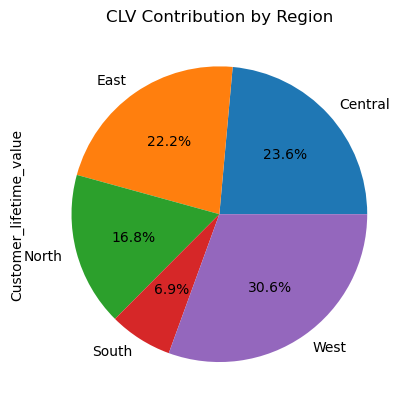

In [49]:
clv_by_region = Sales_Analysis.groupby('Region')['Customer_lifetime_value'].sum()
clv_by_region.plot(kind='pie', autopct='%1.1f%%', title='CLV Contribution by Region')


<AxesSubplot:title={'center':'Average CLV Trend Over Time'}, xlabel='Month'>

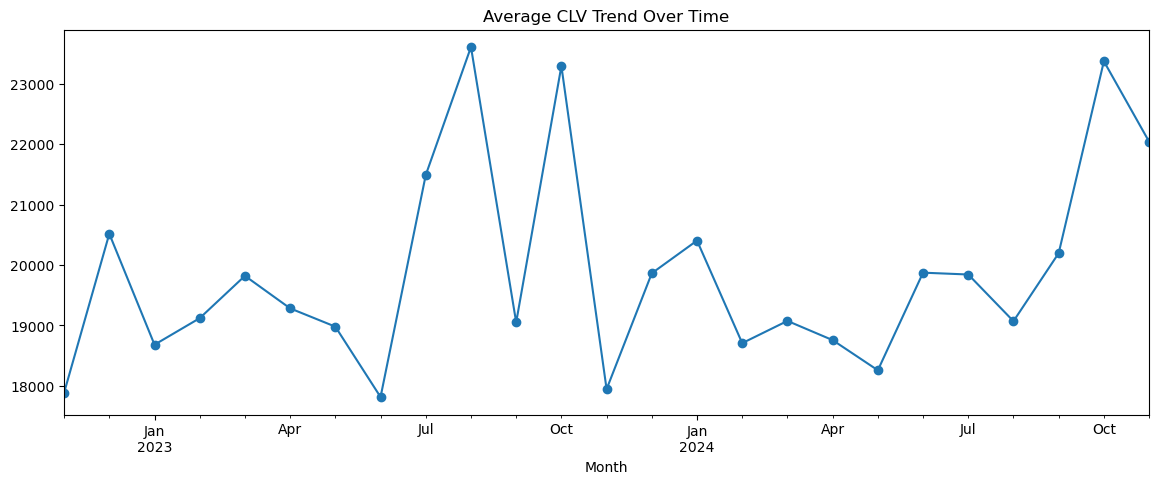

In [125]:
plt.figure(figsize=(14,5))
monthly_clv = Sales_Analysis.groupby('Month')['Customer_lifetime_value'].mean()
monthly_clv.plot(kind='line', marker='o', title='Average CLV Trend Over Time')


### Monthly Sales Revenue

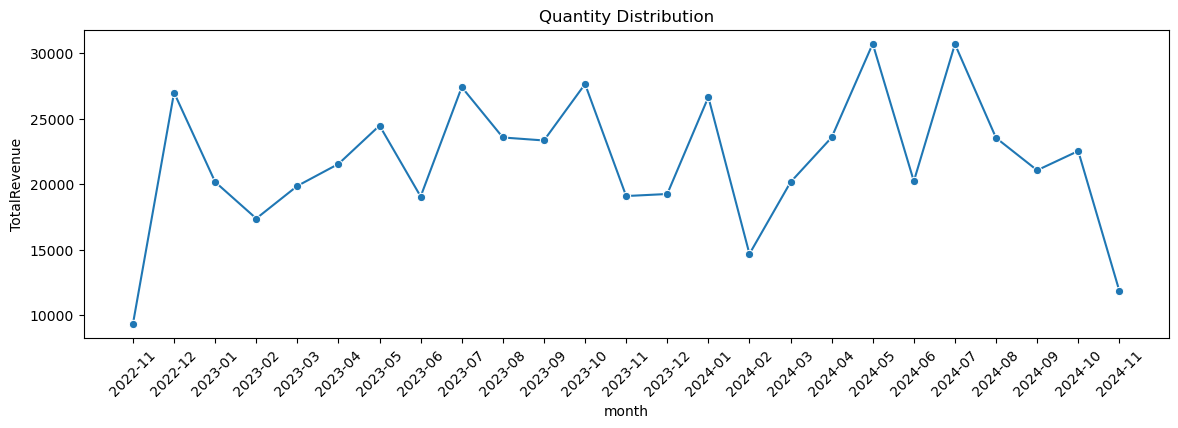

In [51]:
plt.figure(figsize=(14,4))
sns.lineplot(x='month', y= 'TotalRevenue' , data =revenue_by_month ,marker = 'o')
plt.title('Quantity Distribution')
plt.xlabel('month')
plt.ylabel('TotalRevenue')
plt.xticks(rotation = 45)
plt.show()

### 5 best selling Products

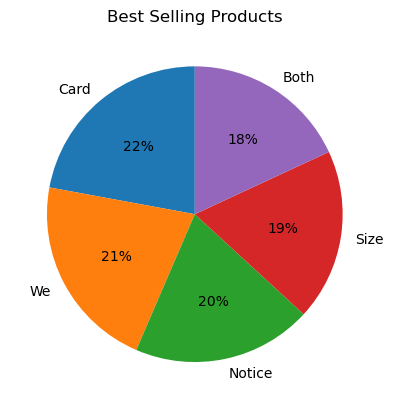

In [108]:
plt.pie(five_best_selling_products['TotalQuantitySold'], labels = five_best_selling_products['ProductName'] ,autopct='%.0f%%',startangle = 90)
plt.title('Best Selling Products')
plt.show()

### Revenue Contribution By Segment

In [100]:
revenue_by_segment = Sales_Analysis.groupby('Segment')['Revenue'].sum().reset_index()
sort_revenue = revenue_by_segment.sort_values(by='Revenue',ascending = False)

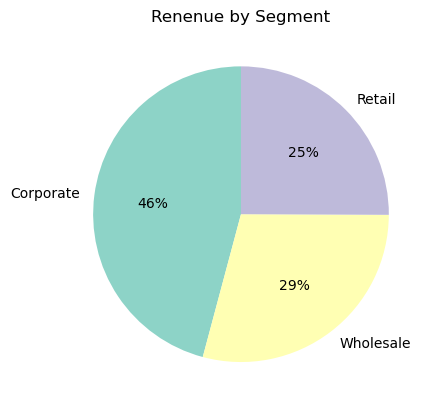

In [103]:
plt.pie(sort_revenue['Revenue'],labels = sort_revenue['Segment'], autopct = '%.0f%%',startangle=90, colors=sns.color_palette('Set3', len(sort_revenue)))
plt.title('Renenue by Segment')
plt.show()

### Revenue Contribution By Region

In [98]:
regional_sales = Sales_Analysis.groupby('Region')['Revenue'].sum().reset_index()
region_sales_sorted=regional_sales.sort_values(by='Revenue',ascending = False)

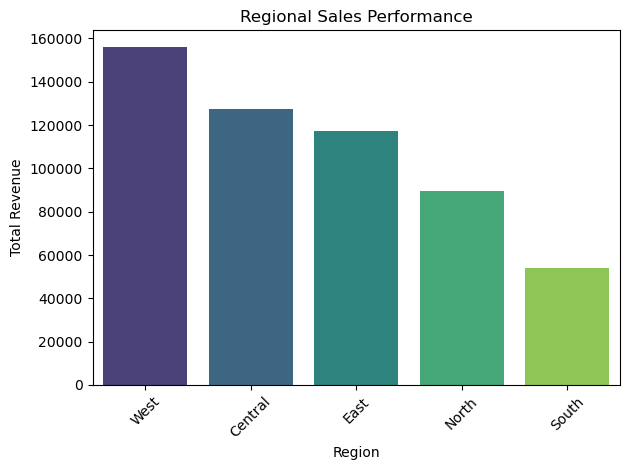

In [99]:
sns.barplot(data=region_sales_sorted, x='Region', y='Revenue', palette='viridis')
plt.title('Regional Sales Performance')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Revenue by Category

In [112]:
Revenue_by_category = Sales_Analysis.groupby('Category')['Revenue'].sum().reset_index()
sorted_revenue_by_category = Revenue_by_category.sort_values(by='Revenue',ascending = False)

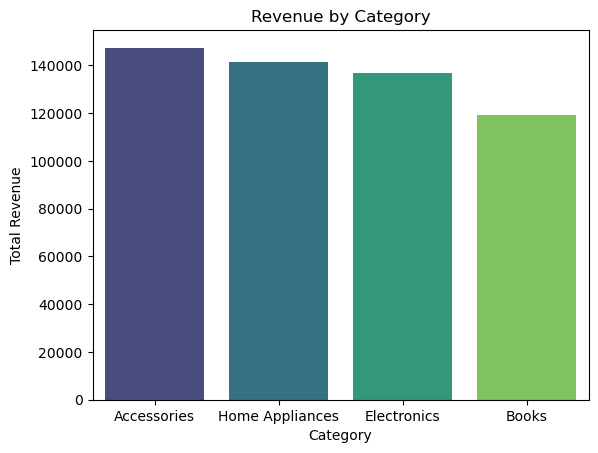

In [115]:
sns.barplot(data=sorted_revenue_by_category, x='Category', y='Revenue', palette='viridis')
plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()

# Category Preference

In [74]:
category_segment_data = Sales_Analysis.groupby(['Segment','Category'])['Quantity'].sum().reset_index()
pivot_table =category_segment_data.pivot(index='Segment',columns ='Category',values='Quantity')
pivot_table

Category,Accessories,Books,Electronics,Home Appliances
Segment,,,,
Corporate,397,199,323,285
Retail,157,200,157,169
Wholesale,158,213,196,210


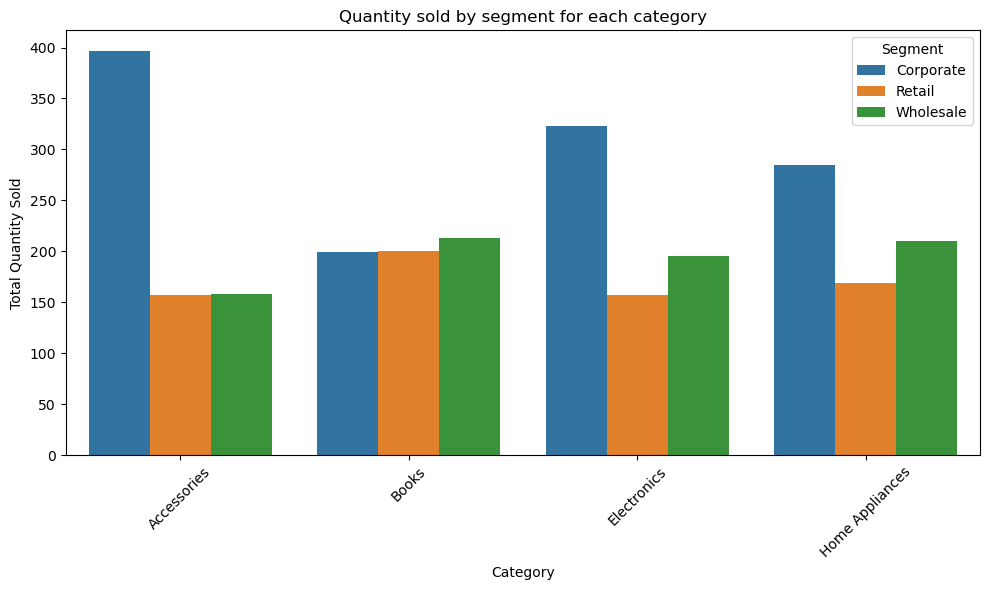

In [78]:
plt.figure(figsize=(10,6))
sns.barplot(data=category_segment_data,x='Category',y='Quantity',hue='Segment')
plt.title('Quantity sold by segment for each category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Highest Discount Category

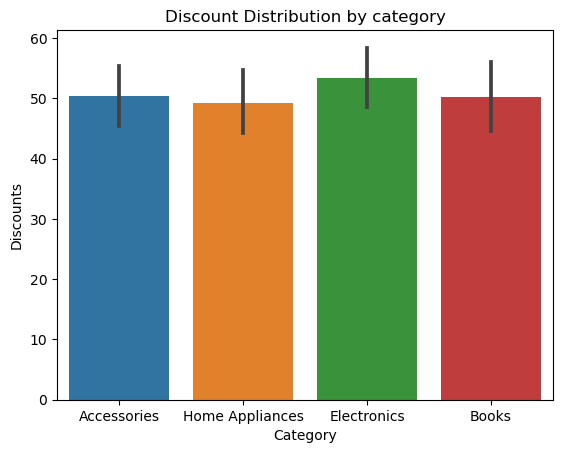

In [57]:
sns.barplot(x = 'Category', y = 'Discounts', data =Sales_Analysis)
plt.title('Discount Distribution by category')
plt.show()

In [89]:
segment_discount = Sales_Analysis.groupby('Segment').agg (
                    total_sales = ('Quantity','sum')).reset_index()

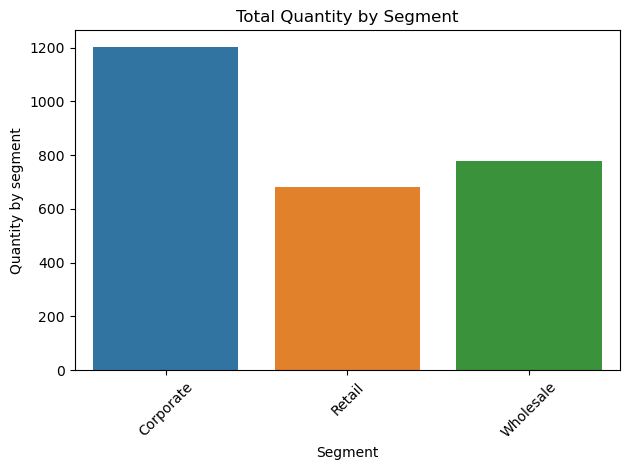

In [90]:
sns.barplot(data =segment_discount, x='Segment',y='total_sales')
plt.title('Total Quantity by Segment')
plt.xlabel('Segment')
plt.ylabel('Quantity by segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Taxes By Category

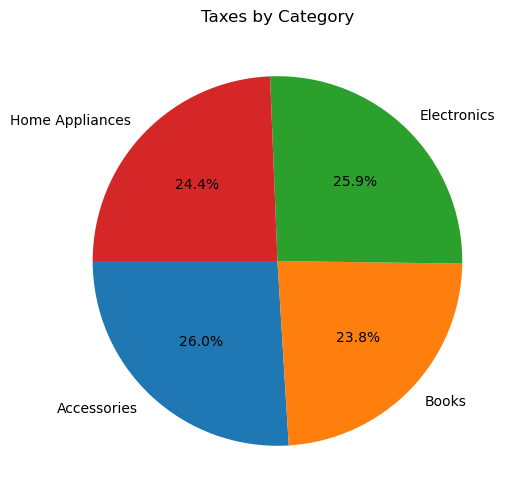

In [58]:
tax_by_category = Sales_Analysis.groupby('Category')['Taxes'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(tax_by_category["Taxes"],labels=tax_by_category["Category"],autopct="%1.1f%%",startangle=180)
plt.title("Taxes by Category")
plt.show()

### Taxes by Segment

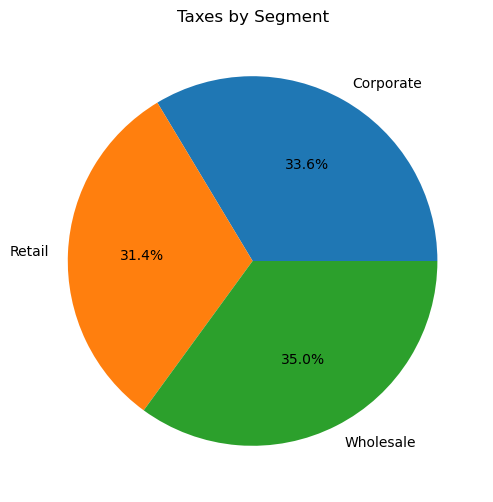

In [59]:
tax_by_segment = Sales_Analysis.groupby('Segment')['Taxes'].mean().reset_index()
plt.figure(figsize = (6,6))
plt.pie(tax_by_segment['Taxes'],labels = tax_by_segment['Segment'],autopct = '%1.1f%%')
plt.title('Taxes by Segment')
plt.show()

### Average Taxes by Region

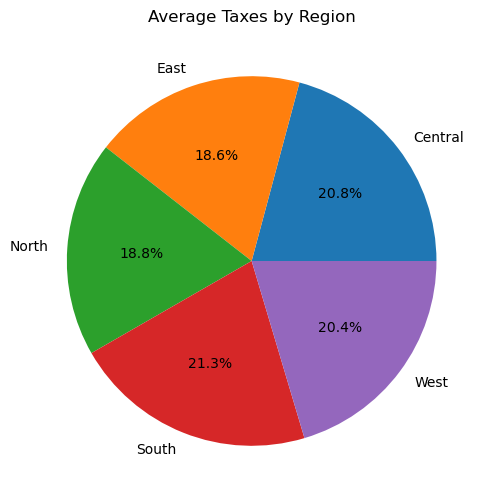

In [60]:
# Calculate average taxes by region
avg_taxes_by_region = Sales_Analysis.groupby('Region')['Taxes'].mean()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(avg_taxes_by_region, labels=avg_taxes_by_region.index, autopct='%1.1f%%')
plt.title('Average Taxes by Region')
plt.show()

# avg_taxes_by_region.plot(kind ='bar' , title   ='Average Tax by Region')

# Results

#### Data Overview

#### Categorical Variables

# EDA Summary

* Best Products and Regions: Accessories are the top-selling product category.The West region generates the highest sales and   
  has the highest average transaction value.
* Corporate Customers:Corporate customers in the West region buying Accessories bring in the most revenue, making them a 
  valuable segment to focus on.
* Customer lifetime value: The West region are the most valuable in terms of lifetime spending or retention.
* Underperforming Areas: The South region has low sales in the Accessories category, showing the need for better strategies like   promotions or targeted advertising.
* Seasonal Trends: July 2024 is the best revenue month, while November 2024 has the lowest sales. This suggests need to boost sales during slower months.
* Discounts: The Electronics category receives the most discounts.
* Order Quantity: Most orders are small to medium in size, with a maximum of 10 items per order.
* Taxes: Accessories contribute the most in taxes, while the South region and Wholesales segment pay the least, likely due to  
  lower sales.